Topic:        Challenge Set 1

Subject:      Explore MTA turnstile data

Date:         09/30/2019

Name:         Julien Ruvira

Worked with:  Alen, Carissa

## #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import seaborn as sns

%matplotlib inline

In [2]:
# def get_data(week_nums):
#     url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
#     dfs = []
#     col_names= ['CA','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']
#     for week_num in week_nums:
#         file_url = url.format(week_num)
#         dfs.append(pd.read_csv(file_url, sep=",", header=0, names = col_names, parse_dates=[['DATE', 'TIME']]))
#     return pd.concat(dfs)
        
# week_nums = [190504, 190511, 190518, 190525]
# df = get_data(week_nums)

In [3]:
# with open('challenge_1_julien_ruvira.pickle', 'wb') as to_write:
#     pickle.dump(df, to_write)

In [4]:
with open('challenge_1_julien_ruvira.pickle','rb') as read_file:
    df = pickle.load(read_file)

## #2 Get datetime

In [5]:
df.head()

,DATE_TIME,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2019-04-27 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035249,2384833
1,2019-04-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035269,2384840
2,2019-04-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035292,2384875
3,2019-04-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035392,2384951
4,2019-04-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035651,2385020


## #3 Get counts per day

In [6]:
df = df[df.DESC == 'REGULAR'] # get only regular occurances

In [7]:
HOURLY_ENTRIES = df.ENTRIES - df.ENTRIES.shift(1)
df['HOURLY_ENTRIES'] = HOURLY_ENTRIES.fillna(0)

HOURLY_EXITS = df.EXITS - df.EXITS.shift(1)
df['HOURLY_EXITS'] = HOURLY_ENTRIES.fillna(0)

In [8]:
df.describe()

,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS
count,8.193980e+05,8.193980e+05,8.193980e+05,8.193980e+05
mean,4.133787e+07,3.389842e+07,-8.579097e+00,-8.579097e+00
std,2.107976e+08,1.945038e+08,4.468576e+07,4.468576e+07
min,0.000000e+00,0.000000e+00,-2.116019e+09,-2.116019e+09
25%,3.556842e+05,1.453970e+05,8.000000e+00,8.000000e+00
50%,2.177859e+06,1.249600e+06,7.200000e+01,7.200000e+01
75%,6.796476e+06,4.607690e+06,2.470000e+02,2.470000e+02
max,2.129343e+09,2.124127e+09,2.121120e+09,2.121120e+09


In [9]:
df.head(10) # here it's still every 4H segments

,DATE_TIME,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS
0,2019-04-27 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035249,2384833,0.0,0.0
1,2019-04-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035269,2384840,20.0,20.0
2,2019-04-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035292,2384875,23.0,23.0
3,2019-04-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035392,2384951,100.0,100.0
4,2019-04-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035651,2385020,259.0,259.0
5,2019-04-27 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035930,2385070,279.0,279.0
6,2019-04-28 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7036100,2385087,170.0,170.0
7,2019-04-28 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7036119,2385088,19.0,19.0
8,2019-04-28 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7036125,2385103,6.0,6.0
9,2019-04-28 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7036197,2385155,72.0,72.0


In [10]:
# Got the sum (flow of traffic)
HOURLY_SUM  = df.HOURLY_ENTRIES + df.HOURLY_EXITS
df['HOURLY_SUM'] = HOURLY_SUM

In [11]:
df['MONTH'] = df['DATE_TIME'].dt.month


In [12]:
# Take care of outliers by month
df['HOURLY_ENTRIES'] = df.groupby(['SCP','MONTH']).HOURLY_ENTRIES.transform(lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))

In [13]:
df['HOURLY_EXITS'] = df.groupby(['SCP','MONTH']).HOURLY_EXITS.transform(lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))


In [14]:
df['HOURLY_SUM'] = df.HOURLY_ENTRIES + df.HOURLY_EXITS

In [15]:
df = df.set_index('DATE_TIME')

In [16]:
df['HOURLY_ENTRIES'].resample('D').sum().head(10)

DATE_TIME
2019-04-27    4.487495e+06
2019-04-28    2.720036e+06
2019-04-29    5.720414e+06
2019-04-30    5.975946e+06
2019-05-01    6.125428e+06
2019-05-02    6.163790e+06
2019-05-03    5.990800e+06
2019-05-04    4.472508e+06
2019-05-05    2.635026e+06
2019-05-06    5.754476e+06
Freq: D, Name: HOURLY_ENTRIES, dtype: float64

In [17]:
gb_unit = df.groupby('UNIT')

In [18]:
gb_unit # gb here is just a gb object, can't do much

In [19]:
# send gb to a variable so we can use as df, also need to chain on resample / count
daily_counts = gb_unit['HOURLY_ENTRIES'].resample('D').sum()

In [20]:
daily_counts.head(10)

UNIT  DATE_TIME 
R001  2019-04-27    39327.544079
      2019-04-28    11060.000000
      2019-04-29    35937.000000
      2019-04-30    34814.000000
      2019-05-01    35050.000000
      2019-05-02    36924.000000
      2019-05-03    34357.000000
      2019-05-04    39869.546860
      2019-05-05    11202.000000
      2019-05-06    36934.000000
Name: HOURLY_ENTRIES, dtype: float64

## #4 -- plot a single unit across the dataset, entries per DAY

In [21]:
daily_counts['R051'].describe()

count       28.000000
mean     27196.355993
std       6757.881270
min      13889.700514
25%      19668.333785
50%      31141.558680
75%      32195.200514
max      33561.700514
Name: HOURLY_ENTRIES, dtype: float64

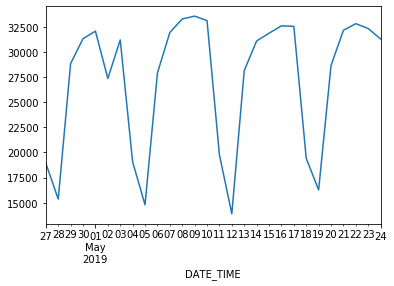

In [22]:
daily_counts['R051'].plot()

### 5 - Get Count for each SCP values

In [23]:
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,HOURLY_SUM,MONTH
DATE_TIME,,,,,,,,,,,,,
2019-04-27 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035249,2384833,0.0,0.0,0.0,4
2019-04-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035269,2384840,20.0,20.0,40.0,4
2019-04-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035292,2384875,23.0,23.0,46.0,4
2019-04-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035392,2384951,100.0,100.0,200.0,4
2019-04-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035651,2385020,259.0,259.0,518.0,4


In [24]:
print(df.groupby(["CA", "UNIT","STATION"])["HOURLY_ENTRIES"].resample('D').sum().head(10))

CA    UNIT  STATION  DATE_TIME 
A002  R051  59 ST    2019-04-27     8202.090692
                     2019-04-28     6768.000000
                     2019-04-29    12441.000000
                     2019-04-30    13328.000000
                     2019-05-01    13939.000000
                     2019-05-02    13881.000000
                     2019-05-03    13624.000000
                     2019-05-04     8200.289887
                     2019-05-05     6566.000000
                     2019-05-06    12318.000000
Name: HOURLY_ENTRIES, dtype: float64


## #6 & 7-- station level

In [25]:
gb_station = df.groupby('STATION')

In [27]:
daily_counts_by_station = gb_station['HOURLY_ENTRIES'].resample('D').sum()

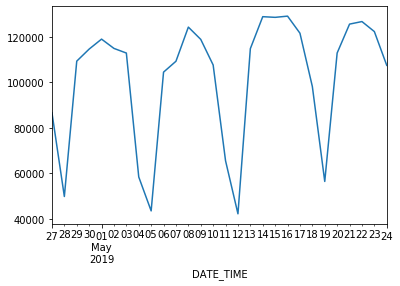

In [28]:
daily_counts_by_station['23 ST'].plot()

## #8 Station by weeks

In [29]:
daily_counts_by_station = gb_station['HOURLY_ENTRIES'].resample('D').sum()

In [30]:
resample_by_week = gb_station['HOURLY_ENTRIES'].resample('W').sum()

In [31]:
# GET THE WEEKLY SUM FOR ONE STATION
resample_by_week['1 AV']

DATE_TIME
2019-04-28     11640.926383
2019-05-05    106722.517972
2019-05-12    106210.517972
2019-05-19    107676.517972
2019-05-26     95316.000000
Name: HOURLY_ENTRIES, dtype: float64

In [32]:
week1 = daily_counts_by_station['1 AV']['2019-04-29': '2019-05-05']
week2 = daily_counts_by_station['1 AV']['2019-05-06': '2019-05-12']
week3 = daily_counts_by_station['1 AV']['2019-05-13': '2019-05-19']
week4 = daily_counts_by_station['1 AV']['2019-05-20': '2019-05-26']

In [33]:
week1[:]

DATE_TIME
2019-04-29    17134.000000
2019-04-30    18588.000000
2019-05-01    19221.000000
2019-05-02    19406.000000
2019-05-03    19732.000000
2019-05-04     6894.517972
2019-05-05     5747.000000
Name: HOURLY_ENTRIES, dtype: float64

In [34]:
list_week1 = list(week1)
list_week2 = list(week2)
list_week3 = list(week3)
list_week4 = list(week4)

In [35]:
list_week1

[17134.0, 18588.0, 19221.0, 19406.0, 19732.0, 6894.517971785137, 5747.0]

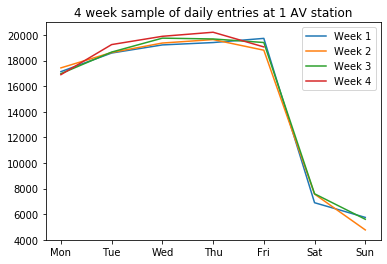

In [36]:
plt.plot(list_week1, label='Week 1')
plt.plot(list_week2, label='Week 2')
plt.plot(list_week3, label='Week 3')
plt.plot(list_week4, label='Week 4')


x_ticks = range(0,7) # Do I need to specify # of ticks, then rename?
days_list = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
plt.title('4 week sample of daily entries at 1 AV station')
plt.xticks(x_ticks, days_list)
plt.legend();

### 9 and 10 Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [37]:
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,HOURLY_ENTRIES,HOURLY_EXITS,HOURLY_SUM,MONTH
DATE_TIME,,,,,,,,,,,,,
2019-04-27 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035249,2384833,0.0,0.0,0.0,4
2019-04-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035269,2384840,20.0,20.0,40.0,4
2019-04-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035292,2384875,23.0,23.0,46.0,4
2019-04-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035392,2384951,100.0,100.0,200.0,4
2019-04-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7035651,2385020,259.0,259.0,518.0,4


In [38]:
total_ridership_counts = df.groupby(["STATION"])["HOURLY_ENTRIES"].sum().sort_values(ascending=False)

In [39]:
data = list(total_ridership_counts)

(array([92., 99., 45., 43., 28., 17., 11.,  8.,  6.,  4.,  3.,  3.,  1.,
         3.,  1.,  2.,  0.,  2.,  1.,  0.,  0.,  1.,  2.,  1.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.]), array([   7956.35294817,  115431.07185067,  222905.79075316,
         330380.50965565,  437855.22855814,  545329.94746063,
         652804.66636313,  760279.38526562,  867754.10416811,
         975228.8230706 , 1082703.54197309, 1190178.26087559,
        1297652.97977808, 1405127.69868057, 1512602.41758306,
        1620077.13648555, 1727551.85538805, 1835026.57429054,
        1942501.29319303, 2049976.01209552, 2157450.73099801,
        2264925.44990051, 2372400.168803  , 2479874.88770549,
        2587349.60660798, 2694824.32551047, 2802299.04441296,
        2909773.76331546, 3017248.48221795, 3124723.20112044,
        3232197.92002293, 3339672.63892542, 3447147.35782792,
        3554622.07673041, 3662096.7956329 , 3769571.51453539,
        3877046.2334378

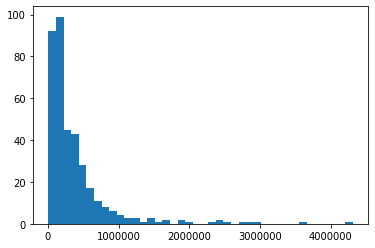

In [40]:
plt.hist(total_ridership_counts, bins=40)